In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math

In [158]:
excel_jogos = pd.read_csv("steam-store-games/steam.csv")
excel_requisitos = pd.read_csv("steam-store-games/steam_requirements_data.csv")

In [159]:
excel_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [160]:
excel_jogos.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
appid,1.000000,-0.116878,-0.087740,0.040510,-0.070888,-0.052198,-0.070236,-0.048308,-0.152112
english,-0.116878,1.000000,0.002860,0.014121,0.006001,0.005705,0.000338,-0.003416,0.007716
required_age,-0.087740,0.002860,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358
achievements,0.040510,0.014121,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996
positive_ratings,-0.070888,0.006001,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110
negative_ratings,-0.052198,0.005705,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259
average_playtime,-0.070236,0.000338,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242
median_playtime,-0.048308,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610
price,-0.152112,0.007716,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000


In [161]:
excel_jogos["ratings"] = excel_jogos["positive_ratings"] + excel_jogos["negative_ratings"]

In [162]:
generos = excel_jogos.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_generos

['Action',
 'Free to Play',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Animation & Modeling',
 'Video Production',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Nudity',
 'Sports',
 'Early Access',
 'Gore',
 'Utilities',
 'Design & Illustration',
 'Web Publishing',
 'Education',
 'Software Training',
 'Sexual Content',
 'Audio Production',
 'Game Development',
 'Photo Editing',
 'Accounting',
 'Documentary',
 'Tutorial']

In [163]:
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]

In [164]:
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

In [165]:
for i in lista_generos:
    contador = 0
    for k in excel_jogos.genres:
        if i in k:
            contador += 1
    print("{0}:".format(i), contador)

Action: 11903
Strategy: 5247
Adventure: 10032
Indie: 19421
RPG: 4311
Casual: 10210
Simulation: 5194
Racing: 1024
Violent: 843
Massively Multiplayer: 723
Sports: 1322
Gore: 537


# DF só com jogos

In [228]:
for i in lista_software:
    excel_only_jogos = excel_jogos[~excel_jogos.genres.str.contains(i)]
excel_only_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,negative_ratings,average_playtime,median_playtime,owners,price,ratings,log_average_playtime,n_tags,n_cat,rating_per
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3339,17612,317,10000000-20000000,7.19,127873,9.776336,27075,4,0.973888
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,633,277,62,5000000-10000000,3.99,3951,5.624018,27075,4,0.839828
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,398,187,34,5000000-10000000,3.99,3814,5.231109,27075,2,0.895675
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,267,258,184,5000000-10000000,3.99,1540,5.552960,27075,4,0.826736
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,288,624,415,5000000-10000000,3.99,5538,6.436150,27075,3,0.948005
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,684,175,10,5000000-10000000,3.99,3442,5.164786,27075,3,0.801336
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,1100,1300,83,5000000-10000000,7.19,28855,7.170120,27075,5,0.961880
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,1439,427,43,10000000-20000000,7.19,13559,6.056784,27075,3,0.893879
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,420,361,205,5000000-10000000,3.99,4242,5.888878,27075,1,0.901013
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,2419,691,402,10000000-20000000,7.19,70321,6.538140,27075,7,0.965601


# 

In [236]:
n_cat = []
for i in excel_jogos.categories:
    n_cat.append(i.count(";")+1)
excel_jogos["n_cat"] = pd.Series(n_cat)

excel_jogos["ratings"] = excel_jogos["positive_ratings"] + excel_jogos["negative_ratings"]

rating_perc = []
for i in excel_jogos.name:
    if excel_jogos.loc[excel_jogos.name == i].ratings == 0:
        rating_perc.append(None)
    elif (excel_jogos.loc[excel_jogos.name == i].positive_ratings > 1) and (excel_jogos.loc[excel_jogos.name == i].negative_ratings == 0):
        rating_perc.append(1)
    elif (excel_jogos.loc[excel_jogos.name == i].negative_ratings > 1) and (excel_jogos.loc[excel_jogos.name == i].positive_ratings == 0):
        rating_perc.append(0)
    else:
        ratings_perc.append(excel_jogos.loc[excel_jogos.name == i].positive_ratings/excel_jogos.loc[excel_jogos.name == i].ratings)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Tempo de jogo médio por gênero:

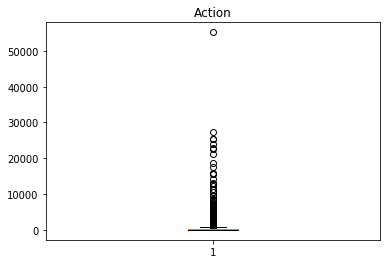

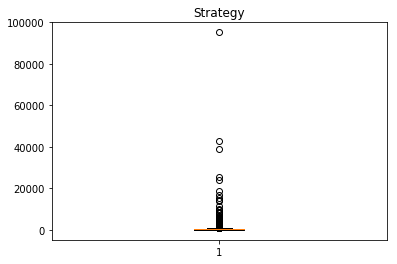

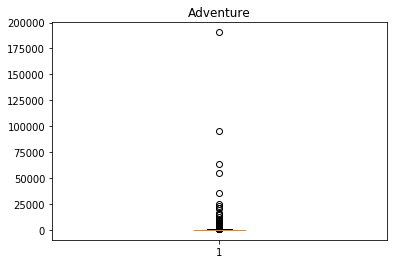

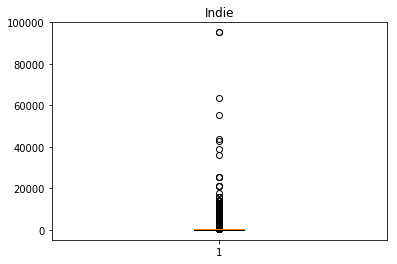

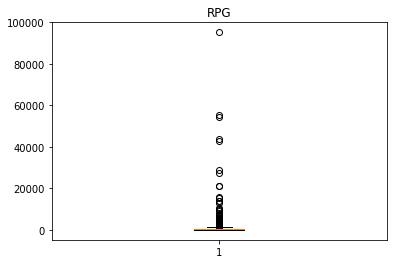

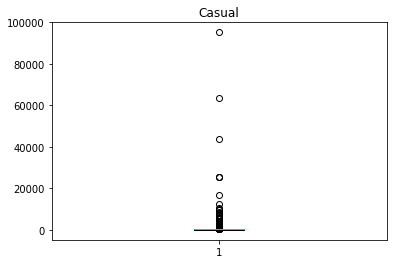

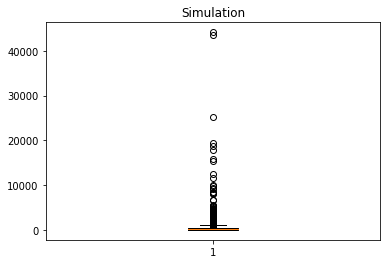

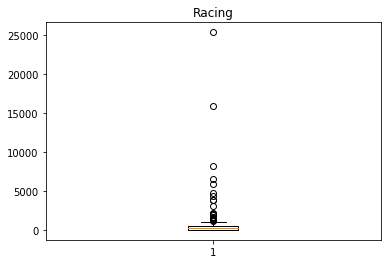

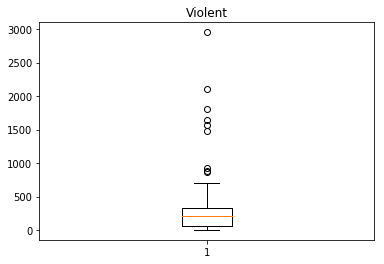

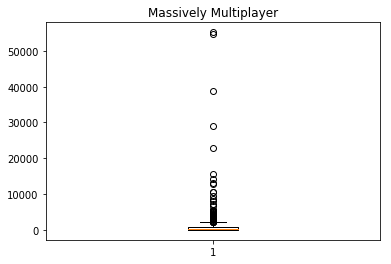

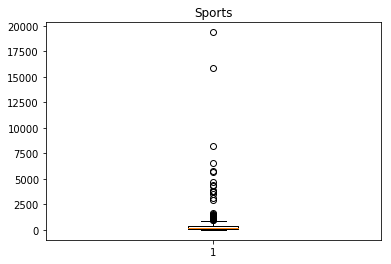

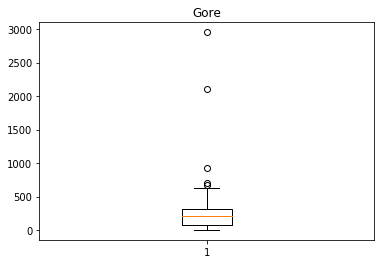

In [198]:
for i in lista_generos:
    t_medio = excel_jogos
#     t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
#     print(t_medio.loc[t_medio.genres == i].average_playtime)
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime)
    plt.title(i)
    plt.show()

# Log Tempo de jogo médio por gênero:

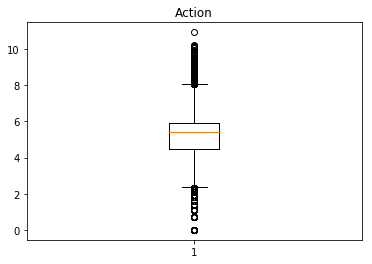

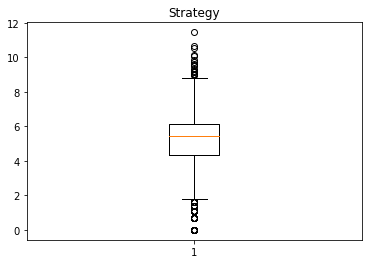

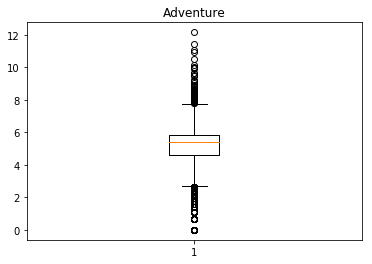

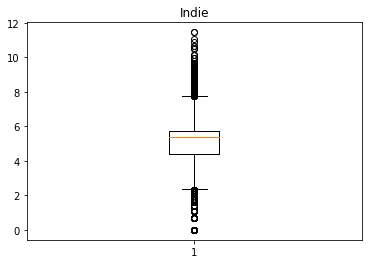

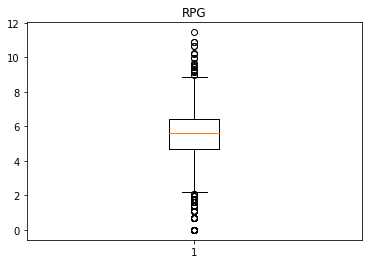

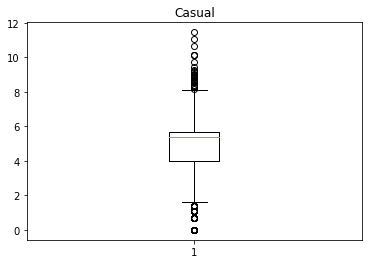

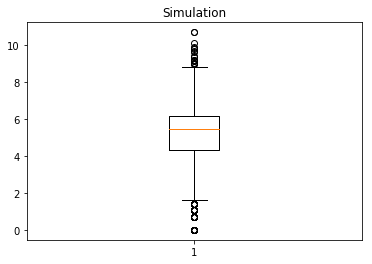

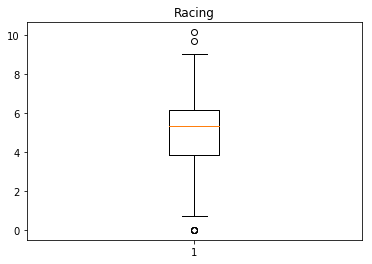

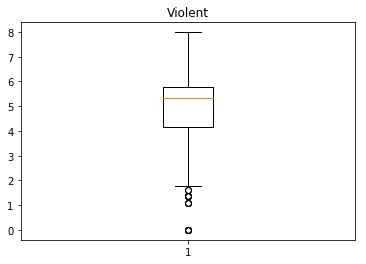

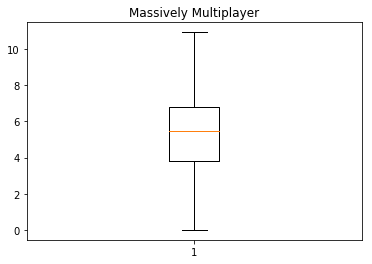

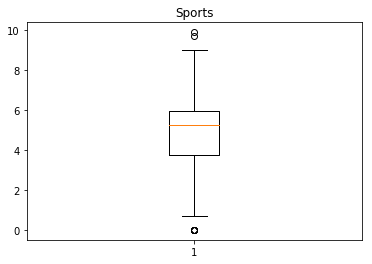

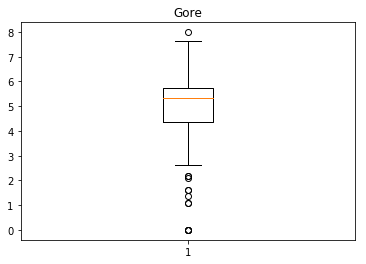

In [197]:
for i in lista_generos:
    t_medio = excel_jogos
    t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime)
    plt.title(i)
    plt.show()